In [1451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1452]:
df = pd.read_csv('./Data/GGS/GGS_defence.csv')
df.head(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,GRC,GGEXP,DEF,PC_GDP,A,2013,2.147195,NaN
1,GRC,GGEXP,DEF,PC_GDP,A,2014,2.662652,NaN
2,GRC,GGEXP,DEF,PC_GDP,A,2015,2.506511,NaN
3,GRC,GGEXP,DEF,PC_GDP,A,2016,2.099860,NaN
4,GRC,GGEXP,DEF,PC_GDP,A,2017,2.489213,NaN
5,GRC,GGEXP,DEF,PC_GDP,A,2018,2.030711,NaN
6,JPN,GGEXP,DEF,PC_GDP,A,2013,0.912127,NaN
7,JPN,GGEXP,DEF,PC_GDP,A,2014,0.941725,NaN
8,JPN,GGEXP,DEF,PC_GDP,A,2015,0.919559,NaN
9,JPN,GGEXP,DEF,PC_GDP,A,2016,0.878538,NaN


In [1453]:
oecd_countries = sorted(df.LOCATION.unique())

In [1493]:
spi_data = pd.read_excel('./Data/2014-2019-SPI-Public.xlsx', sheet_name=None)
spi = []
for i in range(2014, 2020):
    df = spi_data[str(i)][['Country', 'Code', 'Social Progress Index']][1:]
    df['Year'] = i
    spi.append(df[['Country', 'Code', 'Year', 'Social Progress Index']])
spi_full = pd.concat(spi)

In [1487]:
top50 = (spi_data['2019'][['Country', 'Code', 'Social Progress Index']]
        .sort_values(by=['Social Progress Index'], ascending=False)[:50])
top50[-top50['Code'].apply(lambda x: x in oecd_countries)]

,Country,Code,Social Progress Index
100,New Zealand,NZL,88.93
24,Canada,CAN,88.81
124,Singapore,SGP,83.23
36,Cyprus,CYP,83.14
88,Malta,MLT,82.63
34,Croatia,HRV,79.21
10,Barbados,BRB,77.89
147,Uruguay,URY,77.77
5,Argentina,ARG,76.86
18,Bulgaria,BGR,76.17


In [1500]:
spi_full = spi_full[-spi_full['Social Progress Index'].isna()]
spi_full

,Country,Code,Year,Social Progress Index
1,Afghanistan,AFG,2014,35.20
2,Albania,ALB,2014,70.31
3,Algeria,DZA,2014,63.76
4,Angola,AGO,2014,38.51
5,Argentina,ARG,2014,74.70
...,...,...,...,...
145,United Kingdom,GBR,2019,87.98
146,United States,USA,2019,83.62
147,Uruguay,URY,2019,77.77
148,Uzbekistan,UZB,2019,59.83


In [1497]:
spi_pivot = pd.pivot_table(spi_full, index=['Country', 'Code'], columns=['Year'], values=['Social Progress Index'])
spi_pivot

Social Progress Index                                   
Year                                 2014   2015   2016   2017   2018   2019
Country        Code                                                         
Afghanistan    AFG                  35.20  35.88  36.93  36.67  38.34  38.60
Albania        ALB                  70.31  70.97  70.85  71.15  71.52  71.57
Algeria        DZA                  63.76  64.06  64.39  65.65  65.80  67.06
Angola         AGO                  38.51  38.88  39.39  40.56  40.99  42.58
Argentina      ARG                  74.70  74.81  74.94  75.77  76.15  76.86
...                                   ...    ...    ...    ...    ...    ...
United Kingdom GBR                  87.42  87.38  88.02  87.84  88.06  87.98
United States  USA                  84.74  84.71  85.09  84.18  83.85  83.62
Uruguay        URY                  77.73  79.67  80.31  79.50  79.20  77.77
Uzbekistan     UZB                  55.89  56.25  56.64  57.59  59.34  59.83
Zimbabwe       ZWE                  44.37  45.06  44.95  44.88  46.07  46.58

[149 rows x 6 columns]

In [1501]:
pd.to_pickle(spi_full, 'spi.pkl')

In [1644]:
spi_data['2019']

,2019 ranking,Country,Code,Status,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,...,Corruption (0=high; 100=low),Acceptance of gays and lesbians (0=low; 100=high),Discrimination and violence against minorities (1=low; 10=high),Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities
0,NaN,World,WWW,NaN,64.47,74.40,67.50,51.52,82.86,76.95,...,40.415055,31.846298,7.270748,1.906457,1.8048,1.889693,2.039145,7.381189,71.167847,13.290866
1,143.0,Afghanistan,AFG,Ranked,38.60,51.72,38.91,25.17,58.74,49.48,...,16.000000,3.234700,7.800000,1.172000,0.9960,1.834000,0.499610,1.900000,0.000000,0.000000
2,54.0,Albania,ALB,Ranked,71.57,85.03,79.03,50.65,91.62,92.56,...,36.000000,9.746500,4.300000,2.340000,1.3430,2.506000,3.040540,9.800000,0.000000,0.000000
3,79.0,Algeria,DZA,Ranked,67.06,82.75,67.74,50.68,90.52,88.25,...,35.000000,20.578400,7.400000,1.853000,2.2080,2.226000,2.386050,7.600000,6.000000,15.000000
4,137.0,Angola,AGO,Ranked,42.58,49.00,45.05,33.70,59.03,39.88,...,19.000000,12.627000,7.500000,2.445000,0.7260,1.389000,0.506810,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,NaN,Svalbard and Jan Mayen Islands,SJM,Indicators only,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
235,NaN,Western Sahara,ESH,Indicators only,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
236,NaN,Syria,SYR,Not ranked,NaN,NaN,NaN,25.96,NaN,90.08,...,13.000000,36.057100,10.000000,0.127000,0.4980,0.201000,1.959090,4.600000,0.000000,0.000000
237,NaN,Venezuela,VEN,Not ranked,NaN,NaN,64.12,45.65,87.26,NaN,...,18.000000,50.725200,7.600000,2.511000,2.3260,0.404000,3.849620,10.700000,0.000000,0.000000


# NHA WHO Global Health Expenditure Data

In [1767]:
health_ex = pd.read_excel('NHA indicators.xlsx')
health_ex.head()

,Countries,Indicators,Unnamed: 2,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,Value,Value,Value,Value,Value,Value
1,Algeria,General Government Expenditure (GGE) as % Gros...,NaN,43.5431,36.1855,40.6056,45.8115,41.6402,39.1663
2,Angola,General Government Expenditure (GGE) as % Gros...,NaN,37.2089,37.0496,36.4568,27.0511,22.0431,23.7985
3,Benin,General Government Expenditure (GGE) as % Gros...,NaN,19.4556,20.3548,19.4403,24.9231,21.259,24.3706
4,Benin,Capital Health Expenditure (Domestic Public),% Gross domestic product (GDP),0.170316,0.184838,0.169807,0.184675,NaN,NaN


### Dropping Unwanted Columns

In [1770]:
drop_columns = ['Indicators', 'Unnamed: 2']
    
health_ex = health_ex.iloc[1:]
health_ex1 = health_ex.drop(columns=drop_columns)
health_ex1.head()

,Countries,2012,2013,2014,2015,2016,2017
2,Angola,37.2089,37.0496,36.4568,27.0511,22.0431,23.7985
3,Benin,19.4556,20.3548,19.4403,24.9231,21.259,24.3706
4,Benin,0.170316,0.184838,0.169807,0.184675,NaN,NaN
5,Botswana,37.0765,33.3419,34.6642,37.251,32.9935,32.4222
6,Botswana,NaN,0.154789,1.796e-05,NaN,0.165725,0.122567


In [1772]:
health_ex1['2018'] = np.nan

In [1773]:
health_ex1.head()

,Countries,2012,2013,2014,2015,2016,2017,2018
2,Angola,37.2089,37.0496,36.4568,27.0511,22.0431,23.7985,NaN
3,Benin,19.4556,20.3548,19.4403,24.9231,21.259,24.3706,NaN
4,Benin,0.170316,0.184838,0.169807,0.184675,NaN,NaN,NaN
5,Botswana,37.0765,33.3419,34.6642,37.251,32.9935,32.4222,NaN
6,Botswana,NaN,0.154789,1.796e-05,NaN,0.165725,0.122567,NaN


In [1774]:
health_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 2 to 241
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  240 non-null    object 
 1   2012       215 non-null    object 
 2   2013       219 non-null    object 
 3   2014       224 non-null    object 
 4   2015       220 non-null    object 
 5   2016       219 non-null    object 
 6   2017       211 non-null    object 
 7   2018       0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 15.1+ KB


### Imputing with Interpolation

In [1775]:
for col in health_ex1.columns.tolist()[2:-1]:
    health_ex1[col] = pd.to_numeric(health_ex[col], errors='coerce')

In [1776]:
health_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 2 to 241
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  240 non-null    object 
 1   2012       215 non-null    object 
 2   2013       219 non-null    float64
 3   2014       224 non-null    float64
 4   2015       220 non-null    float64
 5   2016       219 non-null    float64
 6   2017       211 non-null    float64
 7   2018       0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 15.1+ KB


In [1777]:
health_ex1

,Countries,2012,2013,2014,2015,2016,2017,2018
2,Angola,37.2089,37.049564,36.456795,27.051121,22.043110,23.798483,NaN
3,Benin,19.4556,20.354826,19.440275,24.923120,21.258955,24.370623,NaN
4,Benin,0.170316,0.184838,0.169807,0.184675,NaN,NaN,NaN
5,Botswana,37.0765,33.341854,34.664215,37.250969,32.993481,32.422180,NaN
6,Botswana,NaN,0.154789,0.000018,NaN,0.165725,0.122567,NaN
...,...,...,...,...,...,...,...,...
237,Tonga,31.6456,32.828285,34.545456,39.380024,40.760296,41.633465,NaN
238,Tuvalu,80.5556,84.615387,109.756104,121.276596,130.612244,124.528297,NaN
239,Vanuatu,23.3957,21.665369,28.546688,41.479263,36.913467,38.475239,NaN
240,Vanuatu,NaN,NaN,NaN,NaN,NaN,0.036179,NaN


In [1778]:
interps = pd.DataFrame(health_ex1.iloc[:,2:].interpolate(axis=1))
health_ex_interp = health_ex1[['Countries']].join(interps)
health_ex_interp.head()

,Countries,2013,2014,2015,2016,2017,2018
2,Angola,37.049564,36.456795,27.051121,22.043110,23.798483,23.798483
3,Benin,20.354826,19.440275,24.923120,21.258955,24.370623,24.370623
4,Benin,0.184838,0.169807,0.184675,0.184675,0.184675,0.184675
5,Botswana,33.341854,34.664215,37.250969,32.993481,32.422180,32.422180
6,Botswana,0.154789,0.000018,0.082872,0.165725,0.122567,0.122567


#### Backfilling with Means

In [1779]:
health_ex_interp_m = pd.DataFrame(health_ex_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
health_ex_interp_plus = health_ex1[['Countries']].join(health_ex_interp_m)
health_ex_interp_plus.head()

,Countries,2013,2014,2015,2016,2017,2018
2,Angola,37.049564,36.456795,27.051121,22.043110,23.798483,23.798483
3,Benin,20.354826,19.440275,24.923120,21.258955,24.370623,24.370623
4,Benin,0.184838,0.169807,0.184675,0.184675,0.184675,0.184675
5,Botswana,33.341854,34.664215,37.250969,32.993481,32.422180,32.422180
6,Botswana,0.154789,0.000018,0.082872,0.165725,0.122567,0.122567


In [1780]:
health_ex_interp_plus.shape

(240, 7)

In [1781]:
pd.to_pickle(health_ex_interp_plus, 'health_ex.pkl')

# World Factbook Data

In [1218]:
files = ['2020-05-04_data.csv', '2019-12-30_data.csv', 
         '2018-12-31_data.csv', '2017-12-25_data.csv',
         '2016-12-26_data.csv', '2015-12-28_data.csv',
         '2014-12-29_data.csv', '2013-12-30_data.csv']

In [1219]:
col_triplets = [['country', 'budget_surplus_or_deficit_date', 'budget_surplus_or_deficit_percent_of_gdp'],
             ['country', 'electricity_by_source_fossil_fuels_date', 'electricity_by_source_fossil_fuels_percent'],
             ['country', 'electricity_by_source_hydroelectric_plants_date', 'electricity_by_source_hydroelectric_plants_percent'],
             ['country', 'electricity_by_source_nuclear_fuels_date', 'electricity_by_source_nuclear_fuels_percent'],
             ['country', 'electricity_by_source_other_renewable_sources_date', 'electricity_by_source_other_renewable_sources_percent']]

In [1220]:
for file in files:
    df = pd.read_csv(file)
    df_names = ['budget_sur_def', 'fossil_fuels', 'hydroelec',
            'nuclear', 'renewables']

    df_dict = {elem : pd.DataFrame for elem in df_names}
    for key, col_triplet in zip(df_dict.keys(), col_triplets):
        existing_df = df_dict[key]()
        combined = pd.concat([df.country, df[col_triplet]])
        df_dict[key] = existing_df.append(combined)
    

In [1221]:
budget = []
fossil_fuel = []
hydroelec = []
nuclear = []
renews = []

df_list = [budget, fossil_fuel, hydroelec, nuclear, renews]

for file in files:
    df = pd.read_csv(file)
    for i, col_pair in enumerate(col_pairs):
        data = df[col_pair]
        df_list[i].append(data)

for i, feature in enumerate(df_list):
    df_list[i] = pd.concat(feature)
    

In [1222]:
budget = df_list[0]
fossil_fuel = df_list[1]
hydroelec = df_list[2]
nuclear = df_list[3]
renews = df_list[4]


## Budget Surplus or Deficit %GDP

In [1223]:
budget.head()

,country,budget_surplus_or_deficit_date,budget_surplus_or_deficit_percent_of_gdp
0,World,2016.0,-3
1,Afghanistan,2017.0,-15.1
2,Akrotiri,NaN,NaN
3,Albania,2017.0,-2
4,Algeria,2017.0,-9.6


In [1224]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 258
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   2072 non-null   object 
 1   budget_surplus_or_deficit_date            1708 non-null   float64
 2   budget_surplus_or_deficit_percent_of_gdp  1766 non-null   object 
dtypes: float64(1), object(2)
memory usage: 64.8+ KB


In [1225]:
budget = budget[budget.budget_surplus_or_deficit_date > 2012]

In [1226]:
budget.shape

(1399, 3)

In [1227]:
budget.budget_surplus_or_deficit_percent_of_gdp = pd.to_numeric(budget.budget_surplus_or_deficit_percent_of_gdp, errors='coerce')

/Users/emilyng/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1228]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 256
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   1399 non-null   object 
 1   budget_surplus_or_deficit_date            1399 non-null   float64
 2   budget_surplus_or_deficit_percent_of_gdp  1399 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.7+ KB


In [1607]:
countries = budget.country.unique().tolist()

In [1608]:
dates = [2018.0]*len(countries)

In [1609]:
percents = [0.0] + ([np.nan] * (len(countries)-1))

In [1610]:
new_data = pd.DataFrame({'country': countries,
            'budget_surplus_or_deficit_date': dates,
            'budget_surplus_or_deficit_percent_of_gdp': percents})

In [1611]:
new_data.head()

,country,budget_surplus_or_deficit_date,budget_surplus_or_deficit_percent_of_gdp
0,World,2018.0,0.0
1,Afghanistan,2018.0,NaN
2,Albania,2018.0,NaN
3,Algeria,2018.0,NaN
4,American Samoa,2018.0,NaN


In [1612]:
budget = budget.append(new_data)

In [1613]:
budget

,country,budget_surplus_or_deficit_date,budget_surplus_or_deficit_percent_of_gdp
0,World,2016.0,-3.0
1,Afghanistan,2017.0,-15.1
3,Albania,2017.0,-9.6
4,Algeria,2017.0,-2.1
5,American Samoa,2016.0,-6.9
...,...,...,...
207,European Union,2018.0,NaN
208,Macedonia,2018.0,NaN
209,Swaziland,2018.0,NaN
210,Czech Republic,2018.0,NaN


In [1614]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 211
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   1611 non-null   object 
 1   budget_surplus_or_deficit_date            1611 non-null   float64
 2   budget_surplus_or_deficit_percent_of_gdp  1400 non-null   float64
dtypes: float64(2), object(1)
memory usage: 50.3+ KB


### Pivot Table

In [1615]:
budget1 = pd.pivot_table(budget, index=['country'], columns=['budget_surplus_or_deficit_date'], 
                         values=['budget_surplus_or_deficit_percent_of_gdp']).reset_index()
budget1

country  \
budget_surplus_or_deficit_date                   
0                                  Afghanistan   
1                                      Albania   
2                                      Algeria   
3                               American Samoa   
4                                      Andorra   
..                                         ...   
207                                  West Bank   
208                                      World   
209                                      Yemen   
210                                     Zambia   
211                                   Zimbabwe   

                               budget_surplus_or_deficit_percent_of_gdp  \
budget_surplus_or_deficit_date                                   2013.0   
0                                                                 -15.1   
1                                                                  -9.6   
2                                                                  -2.1   
3                                                                  -6.9   
4                                                                   NaN   
..                                                                  ...   
207                                                                 NaN   
208                                                                -3.0   
209                                                                 2.5   
210                                                                -3.2   
211                                                                 NaN   

                                                                   
budget_surplus_or_deficit_date 2014.0 2015.0 2016.0 2017.0 2018.0  
0                                 NaN  -15.1  -15.1  -15.1    NaN  
1                                -9.6   -9.6   -9.6   -9.6    NaN  
2                                -2.1   -2.1   -2.1   -2.1    NaN  
3                                 NaN    NaN   -6.9    NaN    NaN  
4                                 NaN    NaN   -6.7    NaN    NaN  
..                                ...    ...    ...    ...    ...  
207                              -9.1    NaN   -9.1   -9.1    NaN  
208                              -3.0   -3.0   -3.0    NaN    0.0  
209                               2.5    2.5    2.5    2.5    NaN  
210                              -3.2   -3.2   -3.2   -3.2    NaN  
211                              -3.1   -3.1   -3.1   -3.1    NaN  

[212 rows x 7 columns]

### Imputing with Interpolation

In [1616]:
interps = pd.DataFrame(budget1.iloc[:,1:].interpolate(axis=1))
budget_interp = budget1[['country']].join(interps)
budget_interp.head()

country  \
budget_surplus_or_deficit_date                   
0                                  Afghanistan   
1                                      Albania   
2                                      Algeria   
3                               American Samoa   
4                                      Andorra   

                               budget_surplus_or_deficit_percent_of_gdp  \
budget_surplus_or_deficit_date                                   2013.0   
0                                                                 -15.1   
1                                                                  -9.6   
2                                                                  -2.1   
3                                                                  -6.9   
4                                                                   NaN   

                                                                   
budget_surplus_or_deficit_date 2014.0 2015.0 2016.0 2017.0 2018.0  
0                               -15.1  -15.1  -15.1  -15.1  -15.1  
1                                -9.6   -9.6   -9.6   -9.6   -9.6  
2                                -2.1   -2.1   -2.1   -2.1   -2.1  
3                                -6.9   -6.9   -6.9   -6.9   -6.9  
4                                 NaN    NaN   -6.7   -6.7   -6.7

#### Backfilling with Means

In [1617]:
budget_interp_m = pd.DataFrame(budget_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
budget_interp_plus = budget1[['country']].join(budget_interp_m)
budget_interp_plus.head()

country  \
budget_surplus_or_deficit_date                   
0                                  Afghanistan   
1                                      Albania   
2                                      Algeria   
3                               American Samoa   
4                                      Andorra   

                               budget_surplus_or_deficit_percent_of_gdp  \
budget_surplus_or_deficit_date                                   2013.0   
0                                                                 -15.1   
1                                                                  -9.6   
2                                                                  -2.1   
3                                                                  -6.9   
4                                                                  -6.7   

                                                                   
budget_surplus_or_deficit_date 2014.0 2015.0 2016.0 2017.0 2018.0  
0                               -15.1  -15.1  -15.1  -15.1  -15.1  
1                                -9.6   -9.6   -9.6   -9.6   -9.6  
2                                -2.1   -2.1   -2.1   -2.1   -2.1  
3                                -6.9   -6.9   -6.9   -6.9   -6.9  
4                                -6.7   -6.7   -6.7   -6.7   -6.7

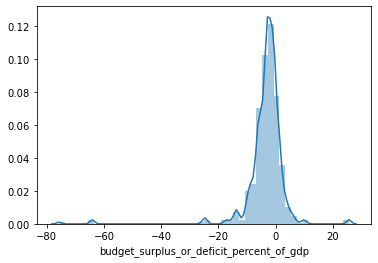

In [1618]:
sns.distplot(budget.budget_surplus_or_deficit_percent_of_gdp)

In [1619]:
budget.describe()

,budget_surplus_or_deficit_date,budget_surplus_or_deficit_percent_of_gdp
count,1611.000000,1400.000000
mean,2015.864680,-3.338857
std,1.624827,7.233228
min,2013.000000,-75.700000
25%,2014.000000,-5.200000
50%,2016.000000,-2.700000
75%,2017.000000,-0.600000
max,2018.000000,25.600000


In [1620]:
pd.to_pickle(budget_interp_plus, 'budget_sur_def.pkl')

## Fossil Fuels

In [1235]:
fossil_fuel.head()

,country,electricity_by_source_fossil_fuels_date,electricity_by_source_fossil_fuels_percent
0,World,2015,63.0
1,Afghanistan,2016,45.0
2,Akrotiri,NaN,NaN
3,Albania,2016,5.0
4,Algeria,2016,96.0


In [1236]:
fossil_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 258
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     2072 non-null   object 
 1   electricity_by_source_fossil_fuels_date     1708 non-null   object 
 2   electricity_by_source_fossil_fuels_percent  1716 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.8+ KB


In [1237]:
fossil_fuel.electricity_by_source_fossil_fuels_date = pd.to_numeric(fossil_fuel['electricity_by_source_fossil_fuels_date'], errors='coerce')

In [1238]:
fossil_fuel.describe()

,electricity_by_source_fossil_fuels_date,electricity_by_source_fossil_fuels_percent
count,1706.000000,1716.000000
mean,2013.310668,66.542832
std,2.483653,33.396152
min,2009.000000,0.000000
25%,2012.000000,45.000000
50%,2014.000000,69.600000
75%,2016.000000,96.000000
max,2017.000000,658.300000


In [1239]:
i = fossil_fuel[fossil_fuel.electricity_by_source_fossil_fuels_percent > 100].index

In [1240]:
fossil_fuel.drop(i, inplace=True)
fossil_fuel.describe()

,electricity_by_source_fossil_fuels_date,electricity_by_source_fossil_fuels_percent
count,1698.000000,1708.000000
mean,2013.311543,66.062763
std,2.483202,30.179333
min,2009.000000,0.000000
25%,2012.000000,45.000000
50%,2014.000000,69.500000
75%,2016.000000,96.000000
max,2017.000000,100.000000


In [1241]:
fossil_fuel = fossil_fuel[fossil_fuel.electricity_by_source_fossil_fuels_date > 2012]
fossil_fuel.head()

,country,electricity_by_source_fossil_fuels_date,electricity_by_source_fossil_fuels_percent
0,World,2015.0,63.0
1,Afghanistan,2016.0,45.0
3,Albania,2016.0,5.0
4,Algeria,2016.0,96.0
5,American Samoa,2016.0,98.0


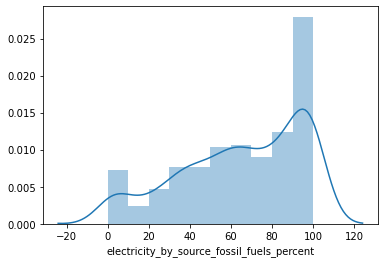

In [1242]:
sns.distplot(fossil_fuel.electricity_by_source_fossil_fuels_percent)

In [1595]:
countries = fossil_fuel.country.unique().tolist()

In [1596]:
dates = [2018.0]*len(countries)

In [1597]:
percents = [0.0] + ([np.nan] * (len(countries)-1))

In [1598]:
new_data = pd.DataFrame({'country': countries,
            'electricity_by_source_fossil_fuels_date': dates,
            'electricity_by_source_fossil_fuels_percent': percents})

In [1599]:
new_data.head()

,country,electricity_by_source_fossil_fuels_date,electricity_by_source_fossil_fuels_percent
0,World,2018.0,0.0
1,Afghanistan,2018.0,NaN
2,Albania,2018.0,NaN
3,Algeria,2018.0,NaN
4,American Samoa,2018.0,NaN


In [1600]:
fossil_fuel= fossil_fuel.append(new_data)

In [1601]:
fossil_fuel

,country,electricity_by_source_fossil_fuels_date,electricity_by_source_fossil_fuels_percent
0,World,2015.0,63.0
1,Afghanistan,2016.0,45.0
3,Albania,2016.0,5.0
4,Algeria,2016.0,96.0
5,American Samoa,2016.0,98.0
...,...,...,...
212,Zambia,2018.0,NaN
213,Zimbabwe,2018.0,NaN
214,European Union,2018.0,NaN
215,Macedonia,2018.0,NaN


In [1602]:
fossil_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 216
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     1148 non-null   object 
 1   electricity_by_source_fossil_fuels_date     1148 non-null   float64
 2   electricity_by_source_fossil_fuels_percent  932 non-null    float64
dtypes: float64(2), object(1)
memory usage: 35.9+ KB


### Pivot Table

In [1603]:
fossil_fuel1 = pd.pivot_table(fossil_fuel, index=['country'], columns=['electricity_by_source_fossil_fuels_date'], 
                         values=['electricity_by_source_fossil_fuels_percent']).reset_index()
fossil_fuel1

country  \
electricity_by_source_fossil_fuels_date                   
0                                           Afghanistan   
1                                               Albania   
2                                               Algeria   
3                                        American Samoa   
4                                                Angola   
..                                                  ...   
212                                      Western Sahara   
213                                               World   
214                                               Yemen   
215                                              Zambia   
216                                            Zimbabwe   

                                        electricity_by_source_fossil_fuels_percent  \
electricity_by_source_fossil_fuels_date                                     2013.0   
0                                                                              NaN   
1                                                                              5.2   
2                                                                              NaN   
3                                                                              NaN   
4                                                                              NaN   
..                                                                             ...   
212                                                                            NaN   
213                                                                            NaN   
214                                                                            NaN   
215                                                                            NaN   
216                                                                            NaN   

                                                                               \
electricity_by_source_fossil_fuels_date 2014.0      2015.0      2016.0 2017.0   
0                                          NaN   44.700000   34.666667    NaN   
1                                          NaN    5.200000    5.000000    NaN   
2                                          NaN   97.900000   96.000000    NaN   
3                                          NaN  100.000000   98.000000    NaN   
4                                          NaN   45.200000   34.000000    NaN   
..                                         ...         ...         ...    ...   
212                                        NaN  100.000000  100.000000    NaN   
213                                        NaN   62.933333         NaN    NaN   
214                                        NaN   99.000000   79.000000    NaN   
215                                        NaN    0.300000    5.000000    NaN   
216                                        NaN   58.000000   58.000000    NaN   

                                                
electricity_by_source_fossil_fuels_date 2018.0  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
..                                         ...  
212                                        NaN  
213                                        0.0  
214                                        NaN  
215                                        NaN  
216                                        NaN  

[217 rows x 7 columns]

In [1604]:
interps = pd.DataFrame(fossil_fuel1.iloc[:,1:].interpolate(axis=1))
fossil_fuel_interp = fossil_fuel1[['country']].join(interps)
fossil_fuel_interp.head()

country  \
electricity_by_source_fossil_fuels_date                   
0                                           Afghanistan   
1                                               Albania   
2                                               Algeria   
3                                        American Samoa   
4                                                Angola   

                                        electricity_by_source_fossil_fuels_percent  \
electricity_by_source_fossil_fuels_date                                     2013.0   
0                                                                              NaN   
1                                                                              5.2   
2                                                                              NaN   
3                                                                              NaN   
4                                                                              NaN   

                                                                             \
electricity_by_source_fossil_fuels_date 2014.0 2015.0     2016.0     2017.0   
0                                          NaN   44.7  34.666667  34.666667   
1                                          5.2    5.2   5.000000   5.000000   
2                                          NaN   97.9  96.000000  96.000000   
3                                          NaN  100.0  98.000000  98.000000   
4                                          NaN   45.2  34.000000  34.000000   

                                                    
electricity_by_source_fossil_fuels_date     2018.0  
0                                        34.666667  
1                                         5.000000  
2                                        96.000000  
3                                        98.000000  
4                                        34.000000

#### Backfilling with Means

In [1605]:
fossil_fuel_interp_m = pd.DataFrame(fossil_fuel_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
fossil_fuel_interp_plus = fossil_fuel1[['country']].join(fossil_fuel_interp_m)
fossil_fuel_interp_plus.head()

country  \
electricity_by_source_fossil_fuels_date                   
0                                           Afghanistan   
1                                               Albania   
2                                               Algeria   
3                                        American Samoa   
4                                                Angola   

                                        electricity_by_source_fossil_fuels_percent  \
electricity_by_source_fossil_fuels_date                                     2013.0   
0                                                                           37.175   
1                                                                            5.200   
2                                                                           96.475   
3                                                                           98.500   
4                                                                           36.800   

                                                                              \
electricity_by_source_fossil_fuels_date  2014.0 2015.0     2016.0     2017.0   
0                                        37.175   44.7  34.666667  34.666667   
1                                         5.200    5.2   5.000000   5.000000   
2                                        96.475   97.9  96.000000  96.000000   
3                                        98.500  100.0  98.000000  98.000000   
4                                        36.800   45.2  34.000000  34.000000   

                                                    
electricity_by_source_fossil_fuels_date     2018.0  
0                                        34.666667  
1                                         5.000000  
2                                        96.000000  
3                                        98.000000  
4                                        34.000000

In [1606]:
pd.to_pickle(fossil_fuel_interp_plus, 'fossil_fuel.pkl')

## Hydroelectric

In [1248]:
hydroelec.head()

,country,electricity_by_source_hydroelectric_plants_date,electricity_by_source_hydroelectric_plants_percent
0,World,2015,18.0
1,Afghanistan,2017,52.0
2,Akrotiri,NaN,NaN
3,Albania,2017,95.0
4,Algeria,2017,1.0


In [1249]:
hydroelec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 258
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             2072 non-null   object 
 1   electricity_by_source_hydroelectric_plants_date     1710 non-null   object 
 2   electricity_by_source_hydroelectric_plants_percent  1716 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.8+ KB


In [1250]:
hydroelec.electricity_by_source_hydroelectric_plants_date = pd.to_numeric(hydroelec['electricity_by_source_hydroelectric_plants_date'], errors='coerce')

In [1251]:
hydroelec = hydroelec[hydroelec.electricity_by_source_hydroelectric_plants_date > 2012]
hydroelec.head()

,country,electricity_by_source_hydroelectric_plants_date,electricity_by_source_hydroelectric_plants_percent
0,World,2015.0,18.0
1,Afghanistan,2017.0,52.0
3,Albania,2017.0,95.0
4,Algeria,2017.0,1.0
5,American Samoa,2017.0,0.0


In [1564]:
countries = hydroelec.country.unique().tolist()

In [1565]:
dates = [2018.0]*len(countries)

In [1566]:
percents = [0.0] + ([np.nan] * (len(countries)-1))

In [1572]:
new_data = pd.DataFrame({'country': countries,
            'electricity_by_source_hydroelectric_plants_date': dates,
            'electricity_by_source_hydroelectric_plants_percent': percents})

In [1573]:
new_data.head()

,country,electricity_by_source_hydroelectric_plants_date,electricity_by_source_hydroelectric_plants_percent
0,World,2018.0,0.0
1,Afghanistan,2018.0,NaN
2,Albania,2018.0,NaN
3,Algeria,2018.0,NaN
4,American Samoa,2018.0,NaN


In [1574]:
hydroelec = hydroelec.append(new_data)

In [1575]:
hydroelec

,country,electricity_by_source_hydroelectric_plants_date,electricity_by_source_hydroelectric_plants_percent,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
0,World,2015.0,18.0,NaN,NaN
1,Afghanistan,2017.0,52.0,NaN,NaN
3,Albania,2017.0,95.0,NaN,NaN
4,Algeria,2017.0,1.0,NaN,NaN
5,American Samoa,2017.0,0.0,NaN,NaN
...,...,...,...,...,...
213,Zambia,2018.0,NaN,NaN,NaN
214,Zimbabwe,2018.0,NaN,NaN,NaN
215,European Union,2018.0,NaN,NaN,NaN
216,Macedonia,2018.0,NaN,NaN,NaN


In [1576]:
hydroelec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 217
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                1376 non-null   object 
 1   electricity_by_source_hydroelectric_plants_date        1158 non-null   float64
 2   electricity_by_source_hydroelectric_plants_percent     941 non-null    float64
 3   electricity_by_source_other_renewable_sources_date     218 non-null    float64
 4   electricity_by_source_other_renewable_sources_percent  1 non-null      float64
dtypes: float64(4), object(1)
memory usage: 64.5+ KB


### Pivot Table

In [1577]:
hydroelec1 = pd.pivot_table(hydroelec, index=['country'], columns=['electricity_by_source_hydroelectric_plants_date'], 
                         values=['electricity_by_source_hydroelectric_plants_percent']).reset_index()
hydroelec1

country  \
electricity_by_source_hydroelectric_plants_date                   
0                                                   Afghanistan   
1                                                       Albania   
2                                                       Algeria   
3                                                American Samoa   
4                                                        Angola   
..                                                          ...   
213                                              Western Sahara   
214                                                       World   
215                                                       Yemen   
216                                                      Zambia   
217                                                    Zimbabwe   

                                                electricity_by_source_hydroelectric_plants_percent  \
electricity_by_source_hydroelectric_plants_date                                             2013.0   
0                                                                                              NaN   
1                                                                                             94.8   
2                                                                                              NaN   
3                                                                                              NaN   
4                                                                                              NaN   
..                                                                                             ...   
213                                                                                            NaN   
214                                                                                            NaN   
215                                                                                            NaN   
216                                                                                            NaN   
217                                                                                            NaN   

                                                                          \
electricity_by_source_hydroelectric_plants_date 2014.0     2015.0 2016.0   
0                                                  NaN  55.100000   86.0   
1                                                  NaN  94.800000    NaN   
2                                                  NaN   1.600000    NaN   
3                                                  NaN   0.000000    NaN   
4                                                  NaN  54.000000    NaN   
..                                                 ...        ...    ...   
213                                                NaN   0.000000    NaN   
214                                                NaN  17.833333    NaN   
215                                                NaN   0.000000    NaN   
216                                                NaN  97.900000    NaN   
217                                                NaN  37.100000    NaN   

                                                               
electricity_by_source_hydroelectric_plants_date 2017.0 2018.0  
0                                                 52.0    NaN  
1                                                 95.0    NaN  
2                                                  1.0    NaN  
3                                                  0.0    NaN  
4                                                 64.0    NaN  
..                                                 ...    ...  
213                                                0.0    NaN  
214                                                NaN    0.0  
215                                                0.0    NaN  
216                                               93.0    NaN  
217                                               37.0    NaN  

[218 rows x 7 columns]

In [1578]:
interps = pd.DataFrame(hydroelec1.iloc[:,1:].interpolate(axis=1))
hydroelec_interp = hydroelec1[['country']].join(interps)
hydroelec_interp.head()

country  \
electricity_by_source_hydroelectric_plants_date                   
0                                                   Afghanistan   
1                                                       Albania   
2                                                       Algeria   
3                                                American Samoa   
4                                                        Angola   

                                                electricity_by_source_hydroelectric_plants_percent  \
electricity_by_source_hydroelectric_plants_date                                             2013.0   
0                                                                                              NaN   
1                                                                                             94.8   
2                                                                                              NaN   
3                                                                                              NaN   
4                                                                                              NaN   

                                                                             \
electricity_by_source_hydroelectric_plants_date 2014.0 2015.0 2016.0 2017.0   
0                                                  NaN   55.1   86.0   52.0   
1                                                 94.8   94.8   94.9   95.0   
2                                                  NaN    1.6    1.3    1.0   
3                                                  NaN    0.0    0.0    0.0   
4                                                  NaN   54.0   59.0   64.0   

                                                        
electricity_by_source_hydroelectric_plants_date 2018.0  
0                                                 52.0  
1                                                 95.0  
2                                                  1.0  
3                                                  0.0  
4                                                 64.0

#### Backfilling with Means

In [1579]:
hydroelec_interp_m = pd.DataFrame(hydroelec_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
hydroelec_interp_plus = hydroelec1[['country']].join(hydroelec_interp_m)
hydroelec_interp_plus.head()

country  \
electricity_by_source_hydroelectric_plants_date                   
0                                                   Afghanistan   
1                                                       Albania   
2                                                       Algeria   
3                                                American Samoa   
4                                                        Angola   

                                                electricity_by_source_hydroelectric_plants_percent  \
electricity_by_source_hydroelectric_plants_date                                             2013.0   
0                                                                                           61.275   
1                                                                                           94.800   
2                                                                                            1.225   
3                                                                                            0.000   
4                                                                                           60.250   

                                                                              \
electricity_by_source_hydroelectric_plants_date  2014.0 2015.0 2016.0 2017.0   
0                                                61.275   55.1   86.0   52.0   
1                                                94.800   94.8   94.9   95.0   
2                                                 1.225    1.6    1.3    1.0   
3                                                 0.000    0.0    0.0    0.0   
4                                                60.250   54.0   59.0   64.0   

                                                        
electricity_by_source_hydroelectric_plants_date 2018.0  
0                                                 52.0  
1                                                 95.0  
2                                                  1.0  
3                                                  0.0  
4                                                 64.0

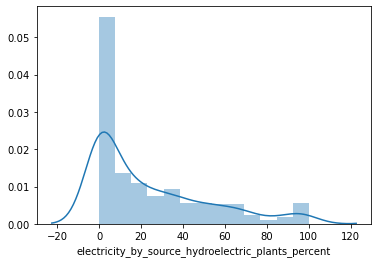

In [1580]:
sns.distplot(hydroelec.electricity_by_source_hydroelectric_plants_percent)

In [1581]:
hydroelec.describe()

,electricity_by_source_hydroelectric_plants_date,electricity_by_source_hydroelectric_plants_percent,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
count,1158.000000,941.000000,218.0,1.0
mean,2016.198618,23.780234,2018.0,0.0
std,1.437947,27.907889,0.0,NaN
min,2013.000000,0.000000,2018.0,0.0
25%,2015.000000,0.000000,2018.0,0.0
50%,2017.000000,14.000000,2018.0,0.0
75%,2017.000000,39.000000,2018.0,0.0
max,2018.000000,100.000000,2018.0,0.0


In [1642]:
pd.to_pickle(hydroelec_interp_plus, 'hydroelec.pkl')

In [1259]:
nuclear.head()

,country,electricity_by_source_nuclear_fuels_date,electricity_by_source_nuclear_fuels_percent
0,World,2015,6.0
1,Afghanistan,2017,0.0
2,Akrotiri,NaN,NaN
3,Albania,2017,0.0
4,Algeria,2017,0.0


In [1260]:
nuclear.shape

(2072, 3)

In [1262]:
nuclear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 258
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      2072 non-null   object 
 1   electricity_by_source_nuclear_fuels_date     1711 non-null   object 
 2   electricity_by_source_nuclear_fuels_percent  1716 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.8+ KB


In [1263]:
nuclear.electricity_by_source_nuclear_fuels_date = pd.to_numeric(nuclear['electricity_by_source_nuclear_fuels_date'], errors='coerce')

In [1265]:
nuclear.describe()

,electricity_by_source_nuclear_fuels_date,electricity_by_source_nuclear_fuels_percent
count,1709.000000,1716.000000
mean,2013.562902,2.075350
std,2.763564,6.596648
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2014.000000,0.000000
75%,2017.000000,0.000000
max,2017.000000,61.000000


/Users/emilyng/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


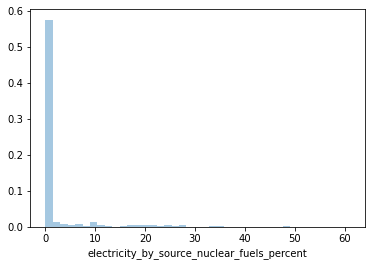

In [1266]:
sns.distplot(nuclear.electricity_by_source_nuclear_fuels_percent)

In [1267]:
nuclear = nuclear[nuclear.electricity_by_source_nuclear_fuels_date > 2012]
nuclear.head()

,country,electricity_by_source_nuclear_fuels_date,electricity_by_source_nuclear_fuels_percent
0,World,2015.0,6.0
1,Afghanistan,2017.0,0.0
3,Albania,2017.0,0.0
4,Algeria,2017.0,0.0
5,American Samoa,2017.0,0.0


In [1582]:
countries = nuclear.country.unique().tolist()

In [1583]:
dates = [2018.0]*len(countries)

In [1584]:
percents = [0.0] + ([np.nan] * (len(countries)-1))

In [1585]:
new_data = pd.DataFrame({'country': countries,
            'electricity_by_source_nuclear_fuels_date': dates,
            'electricity_by_source_nuclear_fuels_percent': percents})

In [1586]:
new_data.head()

,country,electricity_by_source_nuclear_fuels_date,electricity_by_source_nuclear_fuels_percent
0,World,2018.0,0.0
1,Afghanistan,2018.0,NaN
2,Albania,2018.0,NaN
3,Algeria,2018.0,NaN
4,American Samoa,2018.0,NaN


In [1587]:
nuclear = nuclear.append(new_data)

In [1588]:
nuclear

,country,electricity_by_source_nuclear_fuels_date,electricity_by_source_nuclear_fuels_percent
0,World,2015.0,6.0
1,Afghanistan,2017.0,0.0
3,Albania,2017.0,0.0
4,Algeria,2017.0,0.0
5,American Samoa,2017.0,0.0
...,...,...,...
214,Zambia,2018.0,NaN
215,Zimbabwe,2018.0,NaN
216,European Union,2018.0,NaN
217,Macedonia,2018.0,NaN


In [1589]:
nuclear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 218
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      1161 non-null   object 
 1   electricity_by_source_nuclear_fuels_date     1161 non-null   float64
 2   electricity_by_source_nuclear_fuels_percent  943 non-null    float64
dtypes: float64(2), object(1)
memory usage: 36.3+ KB


### Pivot Table

In [1590]:
nuclear1 = pd.pivot_table(nuclear, index=['country'], columns=['electricity_by_source_nuclear_fuels_date'], 
                         values=['electricity_by_source_nuclear_fuels_percent']).reset_index()
nuclear1

country  \
electricity_by_source_nuclear_fuels_date                   
0                                            Afghanistan   
1                                                Albania   
2                                                Algeria   
3                                         American Samoa   
4                                                Andorra   
..                                                   ...   
214                                       Western Sahara   
215                                                World   
216                                                Yemen   
217                                               Zambia   
218                                             Zimbabwe   

                                         electricity_by_source_nuclear_fuels_percent  \
electricity_by_source_nuclear_fuels_date                                      2013.0   
0                                                                                NaN   
1                                                                                0.0   
2                                                                                NaN   
3                                                                                NaN   
4                                                                                NaN   
..                                                                               ...   
214                                                                              NaN   
215                                                                              NaN   
216                                                                              NaN   
217                                                                              NaN   
218                                                                              NaN   

                                                                                
electricity_by_source_nuclear_fuels_date 2014.0    2015.0 2016.0 2017.0 2018.0  
0                                           NaN  0.000000    NaN    0.0    NaN  
1                                           NaN  0.000000    NaN    0.0    NaN  
2                                           NaN  0.000000    NaN    0.0    NaN  
3                                           NaN  0.000000    NaN    0.0    NaN  
4                                           NaN       NaN    0.0    NaN    NaN  
..                                          ...       ...    ...    ...    ...  
214                                         NaN  0.000000    NaN    0.0    NaN  
215                                         NaN  6.066667    NaN    NaN    0.0  
216                                         NaN  0.000000    NaN    0.0    NaN  
217                                         NaN  0.000000    NaN    0.0    NaN  
218                                         NaN  0.000000    NaN    0.0    NaN  

[219 rows x 7 columns]

In [1591]:
interps = pd.DataFrame(nuclear1.iloc[:,1:].interpolate(axis=1))
nuclear_interp = nuclear1[['country']].join(interps)
nuclear_interp.head()

country  \
electricity_by_source_nuclear_fuels_date                   
0                                            Afghanistan   
1                                                Albania   
2                                                Algeria   
3                                         American Samoa   
4                                                Andorra   

                                         electricity_by_source_nuclear_fuels_percent  \
electricity_by_source_nuclear_fuels_date                                      2013.0   
0                                                                                NaN   
1                                                                                0.0   
2                                                                                NaN   
3                                                                                NaN   
4                                                                                NaN   

                                                                             
electricity_by_source_nuclear_fuels_date 2014.0 2015.0 2016.0 2017.0 2018.0  
0                                           NaN    0.0    0.0    0.0    0.0  
1                                           0.0    0.0    0.0    0.0    0.0  
2                                           NaN    0.0    0.0    0.0    0.0  
3                                           NaN    0.0    0.0    0.0    0.0  
4                                           NaN    NaN    0.0    0.0    0.0

#### Backfilling with Means

In [1592]:
nuclear_interp_m = pd.DataFrame(nuclear_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
nuclear_interp_plus = nuclear1[['country']].join(nuclear_interp_m)
nuclear_interp_plus.head()

country  \
electricity_by_source_nuclear_fuels_date                   
0                                            Afghanistan   
1                                                Albania   
2                                                Algeria   
3                                         American Samoa   
4                                                Andorra   

                                         electricity_by_source_nuclear_fuels_percent  \
electricity_by_source_nuclear_fuels_date                                      2013.0   
0                                                                                0.0   
1                                                                                0.0   
2                                                                                0.0   
3                                                                                0.0   
4                                                                                0.0   

                                                                             
electricity_by_source_nuclear_fuels_date 2014.0 2015.0 2016.0 2017.0 2018.0  
0                                           0.0    0.0    0.0    0.0    0.0  
1                                           0.0    0.0    0.0    0.0    0.0  
2                                           0.0    0.0    0.0    0.0    0.0  
3                                           0.0    0.0    0.0    0.0    0.0  
4                                           0.0    0.0    0.0    0.0    0.0

In [1593]:
pd.to_pickle(nuclear_interp_plus, 'nuclear.pkl')

## Other Renewables

In [1272]:
renews.head()

,country,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
0,World,2015,14.0
1,Afghanistan,2017,4.0
2,Akrotiri,NaN,NaN
3,Albania,2017,0.0
4,Algeria,2017,2.0


In [1273]:
renews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 258
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                2072 non-null   object 
 1   electricity_by_source_other_renewable_sources_date     1700 non-null   object 
 2   electricity_by_source_other_renewable_sources_percent  1706 non-null   float64
dtypes: float64(1), object(2)
memory usage: 64.8+ KB


In [1274]:
renews.electricity_by_source_other_renewable_sources_date = pd.to_numeric(renews['electricity_by_source_other_renewable_sources_date'], errors='coerce')

In [1275]:
renews.describe()

,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
count,1698.000000,1706.000000
mean,2013.553004,6.720868
std,2.766681,10.625713
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2014.000000,1.800000
75%,2017.000000,10.000000
max,2017.000000,100.000000


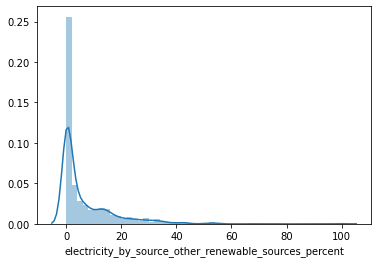

In [1276]:
sns.distplot(renews.electricity_by_source_other_renewable_sources_percent)

In [1277]:
renews = renews[renews.electricity_by_source_other_renewable_sources_date > 2012]
renews.head()

,country,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
0,World,2015.0,14.0
1,Afghanistan,2017.0,4.0
3,Albania,2017.0,0.0
4,Algeria,2017.0,2.0
5,American Samoa,2017.0,2.0


In [1525]:
countries = renews.country.unique().tolist()

In [1526]:
dates = [2018.0]*len(countries)

In [1554]:
percents = [0.0] + ([np.nan] * (len(countries)-1))

In [1555]:
new_data = pd.DataFrame({'country': countries,
            'electricity_by_source_other_renewable_sources_date': dates,
            'electricity_by_source_other_renewable_sources_percent': percents})

In [1556]:
new_data.head()

,country,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
0,World,2018.0,0.0
1,Afghanistan,2018.0,NaN
2,Albania,2018.0,NaN
3,Algeria,2018.0,NaN
4,American Samoa,2018.0,NaN


In [1557]:
renews = renews.append(new_data)

In [1558]:
renews

,country,electricity_by_source_other_renewable_sources_date,electricity_by_source_other_renewable_sources_percent
0,World,2015.0,14.0
1,Afghanistan,2017.0,4.0
3,Albania,2017.0,0.0
4,Algeria,2017.0,2.0
5,American Samoa,2017.0,2.0
...,...,...,...
212,Zambia,2018.0,NaN
213,Zimbabwe,2018.0,NaN
214,European Union,2018.0,NaN
215,Macedonia,2018.0,NaN


In [1559]:
renews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 216
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                1584 non-null   object 
 1   electricity_by_source_other_renewable_sources_date     1584 non-null   float64
 2   electricity_by_source_other_renewable_sources_percent  934 non-null    float64
dtypes: float64(2), object(1)
memory usage: 49.5+ KB


### Pivot Table

In [1560]:
renews1 = pd.pivot_table(renews, index=['country'], columns=['electricity_by_source_other_renewable_sources_date'], 
                         values=['electricity_by_source_other_renewable_sources_percent']).reset_index()
renews1

country  \
electricity_by_source_other_renewable_sources_date                   
0                                                      Afghanistan   
1                                                          Albania   
2                                                          Algeria   
3                                                   American Samoa   
4                                                           Angola   
..                                                             ...   
212                                                 Western Sahara   
213                                                          World   
214                                                          Yemen   
215                                                         Zambia   
216                                                       Zimbabwe   

                                                   electricity_by_source_other_renewable_sources_percent  \
electricity_by_source_other_renewable_sources_date                                                2013.0   
0                                                                                                 NaN      
1                                                                                                 0.0      
2                                                                                                 NaN      
3                                                                                                 NaN      
4                                                                                                 NaN      
..                                                                                                ...      
212                                                                                               NaN      
213                                                                                               NaN      
214                                                                                               NaN      
215                                                                                               NaN      
216                                                                                               NaN      

                                                                             \
electricity_by_source_other_renewable_sources_date 2014.0     2015.0 2016.0   
0                                                     NaN   0.100000    NaN   
1                                                     NaN   0.100000    NaN   
2                                                     NaN   1.500000    NaN   
3                                                     NaN   0.000000    NaN   
4                                                     NaN   0.900000    NaN   
..                                                    ...        ...    ...   
212                                                   NaN   0.000000    NaN   
213                                                   NaN  13.866667    NaN   
214                                                   NaN   2.000000    NaN   
215                                                   NaN   1.800000    NaN   
216                                                   NaN   5.000000    NaN   

                                                                  
electricity_by_source_other_renewable_sources_date 2017.0 2018.0  
0                                                     4.0    NaN  
1                                                     0.0    NaN  
2                                                     2.0    NaN  
3                                                     2.0    NaN  
4                                                     2.0    NaN  
..                                                    ...    ...  
212                                                   0.0    NaN  
213                                                   NaN    0.0  
214                                          

In [1561]:
interps = pd.DataFrame(renews1.iloc[:,1:].interpolate(axis=1))
renews_interp = renews1[['country']].join(interps)
renews_interp.head()

country  \
electricity_by_source_other_renewable_sources_date                   
0                                                      Afghanistan   
1                                                          Albania   
2                                                          Algeria   
3                                                   American Samoa   
4                                                           Angola   

                                                   electricity_by_source_other_renewable_sources_percent  \
electricity_by_source_other_renewable_sources_date                                                2013.0   
0                                                                                                 NaN      
1                                                                                                 0.0      
2                                                                                                 NaN      
3                                                                                                 NaN      
4                                                                                                 NaN      

                                                                         \
electricity_by_source_other_renewable_sources_date 2014.0 2015.0 2016.0   
0                                                     NaN    0.1   2.05   
1                                                    0.05    0.1   0.05   
2                                                     NaN    1.5   1.75   
3                                                     NaN    0.0   1.00   
4                                                     NaN    0.9   1.45   

                                                                  
electricity_by_source_other_renewable_sources_date 2017.0 2018.0  
0                                                     4.0    4.0  
1                                                     0.0    0.0  
2                                                     2.0    2.0  
3                                                     2.0    2.0  
4                                                     2.0    2.0

#### Backfilling with Means

In [1562]:
renews_interp_m = pd.DataFrame(renews_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
renews_interp_plus = renews1[['country']].join(renews_interp_m)
renews_interp_plus.head()

country  \
electricity_by_source_other_renewable_sources_date                   
0                                                      Afghanistan   
1                                                          Albania   
2                                                          Algeria   
3                                                   American Samoa   
4                                                           Angola   

                                                   electricity_by_source_other_renewable_sources_percent  \
electricity_by_source_other_renewable_sources_date                                                2013.0   
0                                                                                              2.5375      
1                                                                                              0.0000      
2                                                                                              1.8125      
3                                                                                              1.2500      
4                                                                                              1.5875      

                                                                          \
electricity_by_source_other_renewable_sources_date  2014.0 2015.0 2016.0   
0                                                   2.5375    0.1   2.05   
1                                                   0.0500    0.1   0.05   
2                                                   1.8125    1.5   1.75   
3                                                   1.2500    0.0   1.00   
4                                                   1.5875    0.9   1.45   

                                                                  
electricity_by_source_other_renewable_sources_date 2017.0 2018.0  
0                                                     4.0    4.0  
1                                                     0.0    0.0  
2                                                     2.0    2.0  
3                                                     2.0    2.0  
4                                                     2.0    2.0

In [1563]:
pd.to_pickle(renews_interp_plus, 'renewables.pkl')

# World Bank Data

## Tax Revenue %GDP

In [1288]:
tax_rev = pd.read_csv('./Data/USE/Tax revenue (%GDP)/Tax_rev.csv', skiprows = 4)
tax_rev.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.916794,7.707801,7.122773,6.882103,7.585382,8.842616,9.250468,NaN,NaN,NaN
2,Angola,AGO,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.103413,14.822719,14.184763,13.542630,11.002019,9.732512,9.223777,NaN,NaN,NaN
3,Albania,ALB,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.022012,17.483234,16.503275,18.301941,18.515796,17.590228,18.887486,18.557475,NaN,NaN
4,Andorra,AND,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Unwanted Columns

In [1289]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64']
for year in range(1960, 2013):
    drop_columns.append(str(year))
    
tax_rev1 = tax_rev.drop(columns=drop_columns)
tax_rev1.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,7.122773,6.882103,7.585382,8.842616,9.250468,NaN,NaN
2,Angola,AGO,14.184763,13.542630,11.002019,9.732512,9.223777,NaN,NaN
3,Albania,ALB,16.503275,18.301941,18.515796,17.590228,18.887486,18.557475,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with Interpolation

In [1505]:
interps = pd.DataFrame(tax_rev1.iloc[:,2:].interpolate(axis=1))
tax_rev_interp = tax_rev1[['Country Name', 'Country Code']].join(interps)
tax_rev_interp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,7.122773,6.882103,7.585382,8.842616,9.250468,9.250468,9.250468
2,Angola,AGO,14.184763,13.542630,11.002019,9.732512,9.223777,9.223777,9.223777
3,Albania,ALB,16.503275,18.301941,18.515796,17.590228,18.887486,18.557475,18.557475
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1506]:
tax_rev_interp.shape

(264, 9)

#### Backfilling with Means

In [1507]:
tax_rev_interp_m = pd.DataFrame(tax_rev_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
tax_rev_interp_plus = tax_rev1[['Country Name', 'Country Code']].join(tax_rev_interp_m)
tax_rev_interp_plus.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,7.122773,6.882103,7.585382,8.842616,9.250468,9.250468,9.250468
2,Angola,AGO,14.184763,13.542630,11.002019,9.732512,9.223777,9.223777,9.223777
3,Albania,ALB,16.503275,18.301941,18.515796,17.590228,18.887486,18.557475,18.557475
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1508]:
tax_rev_interp_plus.shape

(264, 9)

In [1509]:
pd.to_pickle(tax_rev_interp_plus, 'tax_rev.pkl')

## Science, Tech, and Innovation R&D

In [1294]:
sti_rd = pd.read_csv('./Data/USE/Science, Tech R&D/Science,technology and innovation 9.5.1 Research and development expenditure as a proportion of GDP.csv')
sti_rd.head()

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,EXPGDP_TOT,GERD as a percentage of GDP,AUS,Australia,2013,2013,2.17870,NaN,NaN
1,EXPGDP_TOT,GERD as a percentage of GDP,AUS,Australia,2015,2015,1.91943,NaN,NaN
2,EXPGDP_TOT,GERD as a percentage of GDP,AUS,Australia,2017,2017,1.87372,NaN,NaN
3,EXPGDP_TOT,GERD as a percentage of GDP,AUT,Austria,2013,2013,2.95492,NaN,NaN
4,EXPGDP_TOT,GERD as a percentage of GDP,AUT,Austria,2014,2014,3.08429,NaN,NaN


In [1295]:
sti_rd1 = pd.pivot_table(sti_rd, index=['Country', 'LOCATION'], columns=['TIME'], values=['Value']).reset_index()
sti_rd1.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA      NaN      NaN      NaN      NaN   
3                    Angola      AGO      NaN      NaN      NaN  0.03229   
4               Arab States    40525  0.53520  0.55408  0.59361  0.59612   

                    
TIME     2017 2018  
0     0.60899  NaN  
1     0.37710  NaN  
2     0.54243  NaN  
3         NaN  NaN  
4     0.61164  NaN

### Imputing with Means

In [1296]:
sti_rd_imputed = pd.DataFrame(sti_rd1.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
sti_rd_m = sti_rd1[['Country', 'LOCATION']].join(sti_rd_imputed)
sti_rd_m.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA  0.54243  0.54243  0.54243  0.54243   
3                    Angola      AGO  0.03229  0.03229  0.03229  0.03229   
4               Arab States    40525  0.53520  0.55408  0.59361  0.59612   

                         
TIME     2017      2018  
0     0.60899  0.594190  
1     0.37710  0.370156  
2     0.54243  0.542430  
3     0.03229  0.032290  
4     0.61164  0.578130

### Imputing with bfill and ffill

In [1297]:
sti_rd1_bfill = sti_rd1.fillna(method='bfill', axis=1)
sti_rd1_bfill.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA  0.54243  0.54243  0.54243  0.54243   
3                    Angola      AGO  0.03229  0.03229  0.03229  0.03229   
4               Arab States    40525   0.5352  0.55408  0.59361  0.59612   

                    
TIME     2017 2018  
0     0.60899  NaN  
1      0.3771  NaN  
2     0.54243  NaN  
3         NaN  NaN  
4     0.61164  NaN

In [1298]:
sti_rd1_ffill = sti_rd1_bfill.fillna(method='ffill', axis = 1)
sti_rd1_ffill.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA  0.54243  0.54243  0.54243  0.54243   
3                    Angola      AGO  0.03229  0.03229  0.03229  0.03229   
4               Arab States    40525  0.53520  0.55408  0.59361  0.59612   

                        
TIME     2017     2018  
0     0.60899  0.60899  
1     0.37710  0.37710  
2     0.54243  0.54243  
3     0.03229  0.03229  
4     0.61164  0.61164

### Imputing with Interpolation

In [1299]:
interps = pd.DataFrame(sti_rd1.iloc[:,2:].interpolate(axis=1))
sti_rd_interp = sti_rd1[['Country', 'LOCATION']].join(interps)
sti_rd_interp.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA      NaN      NaN      NaN      NaN   
3                    Angola      AGO      NaN      NaN      NaN  0.03229   
4               Arab States    40525  0.53520  0.55408  0.59361  0.59612   

                        
TIME     2017     2018  
0     0.60899  0.60899  
1     0.37710  0.37710  
2     0.54243  0.54243  
3     0.03229  0.03229  
4     0.61164  0.61164

#### Backfilling with means

In [1300]:
sti_rd_interp_m = pd.DataFrame(sti_rd_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
sti_rd_interp_plus = sti_rd1[['Country', 'LOCATION']].join(sti_rd_interp_m)
sti_rd_interp_plus.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA  0.54243  0.54243  0.54243  0.54243   
3                    Angola      AGO  0.03229  0.03229  0.03229  0.03229   
4               Arab States    40525  0.53520  0.55408  0.59361  0.59612   

                        
TIME     2017     2018  
0     0.60899  0.60899  
1     0.37710  0.37710  
2     0.54243  0.54243  
3     0.03229  0.03229  
4     0.61164  0.61164

In [1301]:
sti_rd_interp_plus.shape

(164, 8)

In [1302]:
pd.to_pickle(sti_rd_interp_plus, 'sti_rd.pkl')

## Military Spending

In [1303]:
military = pd.read_csv('./Data/USE/Military Spending/Military Spending.csv', skiprows = 4)
military.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.821346,1.175417,1.076950,1.298013,0.993455,0.955493,0.943963,0.984561,NaN,NaN
2,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.255660,3.236659,4.455239,4.698455,3.105426,2.733341,2.421113,1.777138,NaN,NaN
3,Albania,ALB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.528266,1.487083,1.408982,1.346516,1.162304,1.101508,1.107551,1.178901,NaN,NaN
4,Andorra,AND,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Unwanted Columns

In [1304]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64']
for year in range(1960, 2013):
    drop_columns.append(str(year))
    
military1 = military.drop(columns=drop_columns)
military1.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1.076950,1.298013,0.993455,0.955493,0.943963,0.984561,NaN
2,Angola,AGO,4.455239,4.698455,3.105426,2.733341,2.421113,1.777138,NaN
3,Albania,ALB,1.408982,1.346516,1.162304,1.101508,1.107551,1.178901,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with Interpolation

In [1409]:
interps = pd.DataFrame(military1.iloc[:,2:].interpolate(axis=1))
military_interp = military1[['Country Name', 'Country Code']].join(interps)
military_interp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1.076950,1.298013,0.993455,0.955493,0.943963,0.984561,0.984561
2,Angola,AGO,4.455239,4.698455,3.105426,2.733341,2.421113,1.777138,1.777138
3,Albania,ALB,1.408982,1.346516,1.162304,1.101508,1.107551,1.178901,1.178901
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Backfilling with Means

In [1410]:
military_interp_m = pd.DataFrame(military_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
military_interp_plus = military1[['Country Name', 'Country Code']].join(military_interp_m)
military_interp_plus.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1.076950,1.298013,0.993455,0.955493,0.943963,0.984561,0.984561
2,Angola,AGO,4.455239,4.698455,3.105426,2.733341,2.421113,1.777138,1.777138
3,Albania,ALB,1.408982,1.346516,1.162304,1.101508,1.107551,1.178901,1.178901
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1411]:
military_interp_plus.shape

(264, 9)

In [1412]:
pd.to_pickle(military_interp_plus, 'military.pkl')

## Infrastructure


In [1309]:
infra = pd.read_csv('./Data/USE/Infrastructure/infrastructure_investment.csv')
infra.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INFRAINVEST,INLAND,PC_GDP,A,2013,1.587642,NaN
1,AUS,INFRAINVEST,INLAND,PC_GDP,A,2014,1.361344,NaN
2,AUS,INFRAINVEST,INLAND,PC_GDP,A,2015,1.206979,NaN
3,AUS,INFRAINVEST,INLAND,PC_GDP,A,2016,1.293200,NaN
4,AUS,INFRAINVEST,INLAND,PC_GDP,A,2017,1.462224,NaN


In [1625]:
type(infra.TIME[0])

numpy.int64

In [1632]:
new_data = (pd.DataFrame({'LOCATION': ['AUS'],
            'INDICATOR': ['INFRAINVEST'],
            'SUBJECT': ['INLAND'],
            'MEASURE': ['PC_GDP'],
            'FREQUENCY': ['A'],
            'TIME': [2018],
            'Value': [1.462224],
            'Flag Codes': np.nan}))

In [1633]:
new_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INFRAINVEST,INLAND,PC_GDP,A,2018,1.462224,NaN


In [1634]:
infra = infra.append(new_data)

In [1635]:
infra

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INFRAINVEST,INLAND,PC_GDP,A,2013,1.587642,NaN
1,AUS,INFRAINVEST,INLAND,PC_GDP,A,2014,1.361344,NaN
2,AUS,INFRAINVEST,INLAND,PC_GDP,A,2015,1.206979,NaN
3,AUS,INFRAINVEST,INLAND,PC_GDP,A,2016,1.293200,NaN
4,AUS,INFRAINVEST,INLAND,PC_GDP,A,2017,1.462224,NaN
...,...,...,...,...,...,...,...,...
198,CHN,INFRAINVEST,INLAND,PC_GDP,A,2014,5.003369,NaN
199,CHN,INFRAINVEST,INLAND,PC_GDP,A,2015,5.274492,NaN
200,CHN,INFRAINVEST,INLAND,PC_GDP,A,2016,5.471516,NaN
201,CHN,INFRAINVEST,INLAND,PC_GDP,A,2017,5.840712,NaN


In [1636]:
infra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    203 non-null    object 
 1   INDICATOR   203 non-null    object 
 2   SUBJECT     203 non-null    object 
 3   MEASURE     203 non-null    object 
 4   FREQUENCY   203 non-null    object 
 5   TIME        203 non-null    int64  
 6   Value       203 non-null    float64
 7   Flag Codes  14 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 14.3+ KB


In [1637]:
infra1 = pd.pivot_table(infra, index=['LOCATION'], columns=['TIME'], values=['Value']).reset_index()
infra1.head()

LOCATION     Value                                                  
TIME               2013      2014      2015      2016      2017      2018
0         ALB  2.440645  1.940149  1.751407  0.829825  1.374209       NaN
1         ARM  0.416229  0.901084  0.947390  1.007929       NaN       NaN
2         AUS  1.587642  1.361344  1.206979  1.293200  1.462224  1.462224
3         AUT  0.624247  0.609495  0.582305  0.557322       NaN       NaN
4         AZE  3.434052  2.499403  1.826039  1.458001  1.545588       NaN

### Imputing with interpolation

In [1638]:
interps = pd.DataFrame(infra1.iloc[:,1:].interpolate(axis=1))
infra_interp = infra1[['LOCATION']].join(interps)
infra_interp.head()

LOCATION     Value                                                  
TIME               2013      2014      2015      2016      2017      2018
0         ALB  2.440645  1.940149  1.751407  0.829825  1.374209  1.374209
1         ARM  0.416229  0.901084  0.947390  1.007929  1.007929  1.007929
2         AUS  1.587642  1.361344  1.206979  1.293200  1.462224  1.462224
3         AUT  0.624247  0.609495  0.582305  0.557322  0.557322  0.557322
4         AZE  3.434052  2.499403  1.826039  1.458001  1.545588  1.545588

#### Backfilling with means

In [1639]:
infra_interp_m = pd.DataFrame(infra_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
infra_interp_plus = infra1[['LOCATION']].join(infra_interp_m)
infra_interp_plus.head()

LOCATION     Value                                                  
TIME               2013      2014      2015      2016      2017      2018
0         ALB  2.440645  1.940149  1.751407  0.829825  1.374209  1.374209
1         ARM  0.416229  0.901084  0.947390  1.007929  1.007929  1.007929
2         AUS  1.587642  1.361344  1.206979  1.293200  1.462224  1.462224
3         AUT  0.624247  0.609495  0.582305  0.557322  0.557322  0.557322
4         AZE  3.434052  2.499403  1.826039  1.458001  1.545588  1.545588

In [1640]:
infra_interp_plus.shape

(46, 7)

In [1641]:
pd.to_pickle(infra_interp_plus, 'infra.pkl')

## Inflation Rate Consumer, %GDP

In [1315]:
irc = pd.read_csv('./Data/USE/Inflation Rate consumer/Inflation_rate_consumer_prices.csv', skiprows = 4)
irc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN
1,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN
2,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,13.482468,10.277905,8.777814,7.280387,-21.531694,32.377734,31.691686,20.190374,17.145320,NaN
3,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.429123,2.031596,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091,NaN
4,Andorra,AND,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Unwanted Columns

In [1316]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64']
for year in range(1960, 2013):
    drop_columns.append(str(year))
    
irc1 = irc.drop(columns=drop_columns)
irc1.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462
1,Afghanistan,AFG,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373
2,Angola,AGO,8.777814,7.280387,-21.531694,32.377734,31.691686,20.190374,17.145320
3,Albania,ALB,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with Interpolation

In [1416]:
interps = pd.DataFrame(irc1.iloc[:,2:].interpolate(axis=1))
irc_interp = irc1[['Country Name', 'Country Code']].join(interps)
irc_interp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462
1,Afghanistan,AFG,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373
2,Angola,AGO,8.777814,7.280387,-21.531694,32.377734,31.691686,20.190374,17.145320
3,Albania,ALB,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Backfilling with Means

In [1417]:
irc_interp_m = pd.DataFrame(irc_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
irc_interp_plus = irc1[['Country Name', 'Country Code']].join(irc_interp_m)
irc_interp_plus.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462
1,Afghanistan,AFG,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373
2,Angola,AGO,8.777814,7.280387,-21.531694,32.377734,31.691686,20.190374,17.145320
3,Albania,ALB,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1418]:
irc_interp_plus.shape

(264, 9)

In [1419]:
pd.to_pickle(irc_interp_plus, 'irc.pkl')

## Gross Savings %GDP

In [1321]:
savings = pd.read_csv('./Data/USE/Gross savings (%GDP)/gross_savings_%gdp.csv', skiprows = 4)
savings.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.698072,1.888913,4.965456,9.543736,14.293381,15.190107,14.736893,NaN,NaN,NaN
1,Afghanistan,AFG,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.348364,12.563842,21.773557,19.594725,17.272327,23.971394,24.538687,20.007771,18.85060,NaN
2,Angola,AGO,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.888550,37.232999,32.029882,29.966722,25.021327,24.429248,23.351946,25.173194,NaN,NaN
3,Albania,ALB,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.543727,19.630816,17.741125,15.937207,16.857105,17.053331,16.546662,16.811758,14.26687,NaN
4,Andorra,AND,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Unwanted Columns

In [1322]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64']
for year in range(1960, 2013):
    drop_columns.append(str(year))
    
savings1 = savings.drop(columns=drop_columns)
savings1.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,4.965456,9.543736,14.293381,15.190107,14.736893,NaN,NaN
1,Afghanistan,AFG,21.773557,19.594725,17.272327,23.971394,24.538687,20.007771,18.85060
2,Angola,AGO,32.029882,29.966722,25.021327,24.429248,23.351946,25.173194,NaN
3,Albania,ALB,17.741125,15.937207,16.857105,17.053331,16.546662,16.811758,14.26687
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with Interpolation

In [1423]:
interps = pd.DataFrame(savings1.iloc[:,2:].interpolate(axis=1))
savings_interp = savings1[['Country Name', 'Country Code']].join(interps)
savings_interp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,4.965456,9.543736,14.293381,15.190107,14.736893,14.736893,14.736893
1,Afghanistan,AFG,21.773557,19.594725,17.272327,23.971394,24.538687,20.007771,18.850600
2,Angola,AGO,32.029882,29.966722,25.021327,24.429248,23.351946,25.173194,25.173194
3,Albania,ALB,17.741125,15.937207,16.857105,17.053331,16.546662,16.811758,14.266870
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Backfilling with Means

In [1424]:
savings_interp_m = pd.DataFrame(savings_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
savings_interp_plus = savings1[['Country Name', 'Country Code']].join(savings_interp_m)
savings_interp_plus.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,4.965456,9.543736,14.293381,15.190107,14.736893,14.736893,14.736893
1,Afghanistan,AFG,21.773557,19.594725,17.272327,23.971394,24.538687,20.007771,18.850600
2,Angola,AGO,32.029882,29.966722,25.021327,24.429248,23.351946,25.173194,25.173194
3,Albania,ALB,17.741125,15.937207,16.857105,17.053331,16.546662,16.811758,14.266870
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1425]:
savings_interp_plus.shape

(264, 9)

In [1426]:
pd.to_pickle(savings_interp_plus, 'savings.pkl')

## Health

In [1327]:
health = pd.read_csv('./Data/USE/Govt_health_spending.csv')
health.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,COMPULSORY,PC_GDP,A,2013,5.678,NaN
1,AUS,HEALTHEXP,COMPULSORY,PC_GDP,A,2014,5.830,D
2,AUS,HEALTHEXP,COMPULSORY,PC_GDP,A,2015,6.111,D
3,AUS,HEALTHEXP,COMPULSORY,PC_GDP,A,2016,6.078,D
4,AUS,HEALTHEXP,COMPULSORY,PC_GDP,A,2017,6.120,D


In [1328]:
health1 = pd.pivot_table(health, index=['LOCATION'], columns=['TIME'], values=['Value']).reset_index()
health1.head()

LOCATION  Value                                          
TIME            2013   2014   2015   2016   2017   2018   2019
0         AUS  5.678  5.830  6.111  6.078  6.120  6.193  6.289
1         AUT  7.612  7.673  7.678  7.663  7.661  7.706  7.831
2         BEL  8.028  7.919  7.901  7.824  7.904  7.823  7.864
3         BGR  4.072  4.509  4.161  4.141  4.169  4.340  4.629
4         BRA  3.556  3.709  3.813  3.958  3.952    NaN    NaN

### Imputing with Interpolation

In [1329]:
interps = pd.DataFrame(health1.iloc[:,1:].interpolate(axis=1))
health_interp = health1[['LOCATION']].join(interps)
health_interp.head()

LOCATION  Value                                          
TIME            2013   2014   2015   2016   2017   2018   2019
0         AUS  5.678  5.830  6.111  6.078  6.120  6.193  6.289
1         AUT  7.612  7.673  7.678  7.663  7.661  7.706  7.831
2         BEL  8.028  7.919  7.901  7.824  7.904  7.823  7.864
3         BGR  4.072  4.509  4.161  4.141  4.169  4.340  4.629
4         BRA  3.556  3.709  3.813  3.958  3.952  3.952  3.952

#### Backfilling with means

In [1330]:
health_interp_m = pd.DataFrame(health_interp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1))
health_interp_plus = health1[['LOCATION']].join(health_interp_m)
health_interp_plus.head()

LOCATION  Value                                          
TIME            2013   2014   2015   2016   2017   2018   2019
0         AUS  5.678  5.830  6.111  6.078  6.120  6.193  6.289
1         AUT  7.612  7.673  7.678  7.663  7.661  7.706  7.831
2         BEL  8.028  7.919  7.901  7.824  7.904  7.823  7.864
3         BGR  4.072  4.509  4.161  4.141  4.169  4.340  4.629
4         BRA  3.556  3.709  3.813  3.958  3.952  3.952  3.952

In [1331]:
health_interp_plus.shape

(51, 8)

In [1332]:
pd.to_pickle(health_interp_plus, 'health.pkl')

## GDP per Capita PPP

In [1334]:
gdp_pc_ppp = pd.read_csv('./Data/USE/GDP_per_capita_PPP_current_international_$/GDP_per_capita_PPP.csv', skiprows = 4)
gdp_pc_ppp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,34326.144823,33569.186501,36477.779389,36444.262057,36765.116071,37359.373438,38442.413838,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1699.487997,1914.774351,2015.514962,2069.424642,2087.305323,2128.988026,2202.570851,2241.923246,2293.551684,NaN
2,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6710.750346,7412.965263,7682.477158,8179.296007,7337.569559,7103.225938,7310.901738,7097.118768,6929.678158,NaN
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,10207.769436,10526.295018,10570.977180,11259.246206,11661.976873,12002.931899,13037.010016,13833.981603,14495.078514,NaN
4,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Unwanted Columns

In [1335]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64']
for year in range(1960, 2013):
    drop_columns.append(str(year))
    
gdp_pc_ppp1 = gdp_pc_ppp.drop(columns=drop_columns)
gdp_pc_ppp1.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,36477.779389,36444.262057,36765.116071,37359.373438,38442.413838,NaN,NaN
1,Afghanistan,AFG,2015.514962,2069.424642,2087.305323,2128.988026,2202.570851,2241.923246,2293.551684
2,Angola,AGO,7682.477158,8179.296007,7337.569559,7103.225938,7310.901738,7097.118768,6929.678158
3,Albania,ALB,10570.977180,11259.246206,11661.976873,12002.931899,13037.010016,13833.981603,14495.078514
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with Interpolation

In [1431]:
interps = pd.DataFrame(gdp_pc_ppp1.iloc[:,2:].interpolate(axis=1))
gdp_pc_ppp_interp = gdp_pc_ppp1[['Country Name', 'Country Code']].join(interps)
gdp_pc_ppp_interp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,36477.779389,36444.262057,36765.116071,37359.373438,38442.413838,38442.413838,38442.413838
1,Afghanistan,AFG,2015.514962,2069.424642,2087.305323,2128.988026,2202.570851,2241.923246,2293.551684
2,Angola,AGO,7682.477158,8179.296007,7337.569559,7103.225938,7310.901738,7097.118768,6929.678158
3,Albania,ALB,10570.977180,11259.246206,11661.976873,12002.931899,13037.010016,13833.981603,14495.078514
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Backfilling with Means

In [1432]:
gdp_pc_ppp_interp_m = pd.DataFrame(gdp_pc_ppp_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
gdp_pc_ppp_interp_plus = gdp_pc_ppp1[['Country Name', 'Country Code']].join(gdp_pc_ppp_interp_m)
gdp_pc_ppp_interp_plus.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,36477.779389,36444.262057,36765.116071,37359.373438,38442.413838,38442.413838,38442.413838
1,Afghanistan,AFG,2015.514962,2069.424642,2087.305323,2128.988026,2202.570851,2241.923246,2293.551684
2,Angola,AGO,7682.477158,8179.296007,7337.569559,7103.225938,7310.901738,7097.118768,6929.678158
3,Albania,ALB,10570.977180,11259.246206,11661.976873,12002.931899,13037.010016,13833.981603,14495.078514
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1433]:
gdp_pc_ppp_interp_plus.shape

(264, 9)

In [1434]:
pd.to_pickle(gdp_pc_ppp_interp_plus, 'gdp_pc_ppp.pkl')

## Central Govt Debt %GDP

In [1340]:
cg_debt = pd.read_csv('./Data/USE/Cenral gov debt, total (% of gdp/Central_gov_debt_%GDP.csv', skiprows = 4)
cg_debt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.63767,63.669154,70.580788,73.320247,79.864445,80.735575,NaN,NaN,NaN,NaN
4,Andorra,AND,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Unwanted Columns

In [1341]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64']
for year in range(1960, 2013):
    drop_columns.append(str(year))
    
cg_debt1 = cg_debt.drop(columns=drop_columns)
cg_debt1.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,70.580788,73.320247,79.864445,80.735575,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with Interpolation

In [1440]:
interps = pd.DataFrame(cg_debt1.iloc[:,2:].interpolate(axis=1))
cg_debt_interp = cg_debt1[['Country Name', 'Country Code']].join(interps)
cg_debt_interp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,70.580788,73.320247,79.864445,80.735575,80.735575,80.735575,80.735575
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Backfilling with Means

In [1504]:
cg_debt_interp_m = pd.DataFrame(cg_debt_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
cg_debt_interp_plus = cg_debt1[['Country Name', 'Country Code']].join(cg_debt_interp_m)
cg_debt_interp_plus.head(10)

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,70.580788,73.320247,79.864445,80.735575,80.735575,80.735575,80.735575
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,1.893522,1.893522,1.893522,1.893522,1.893522,1.893522,1.893522
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1442]:
cg_debt_interp_plus.shape

(264, 9)

In [1443]:
pd.to_pickle(cg_debt_interp_plus, 'cg_debt.pkl')

## Education 

In [1345]:
edu = pd.read_csv('./Data/USE/GOV expenditure on edu, total (%GDP)/Education/Expenditure on education as % of GDP (from government sources).csv')
edu.head()

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,XGDP_1_FSGOV,Government expenditure on primary education as...,PER,Peru,1999,1999,1.42278,NaN,NaN
1,XGDP_1_FSGOV,Government expenditure on primary education as...,PER,Peru,2000,2000,1.35125,NaN,NaN
2,XGDP_1_FSGOV,Government expenditure on primary education as...,PER,Peru,2001,2001,1.18355,NaN,NaN
3,XGDP_1_FSGOV,Government expenditure on primary education as...,PER,Peru,2002,2002,1.04542,NaN,NaN
4,XGDP_1_FSGOV,Government expenditure on primary education as...,PER,Peru,2003,2003,1.05624,NaN,NaN


In [1346]:
#only want the general expenditure on education %gdp
gen_edu = edu[edu['Indicator'] == 'Government expenditure on education as a percentage of GDP (%)']
gen_edu.head()

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
146,XGDP_FSGOV,Government expenditure on education as a perce...,AZE,Azerbaijan,1999,1999,4.21214,NaN,NaN
147,XGDP_FSGOV,Government expenditure on education as a perce...,AZE,Azerbaijan,2000,2000,3.85399,NaN,NaN
148,XGDP_FSGOV,Government expenditure on education as a perce...,AZE,Azerbaijan,2001,2001,3.50342,NaN,NaN
149,XGDP_FSGOV,Government expenditure on education as a perce...,AZE,Azerbaijan,2002,2002,3.15446,NaN,NaN
150,XGDP_FSGOV,Government expenditure on education as a perce...,AZE,Azerbaijan,2003,2003,3.28615,NaN,NaN


In [1347]:
#inspect Canada as test case
can_edu = gen_edu[gen_edu.Country == 'Canada']
can_edu.head()

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
9007,XGDP_FSGOV,Government expenditure on education as a perce...,CAN,Canada,1999,1999,5.54994,NaN,NaN
9008,XGDP_FSGOV,Government expenditure on education as a perce...,CAN,Canada,2000,2000,5.44200,NaN,NaN
9009,XGDP_FSGOV,Government expenditure on education as a perce...,CAN,Canada,2001,2001,4.96956,NaN,NaN
9010,XGDP_FSGOV,Government expenditure on education as a perce...,CAN,Canada,2002,2002,5.01073,NaN,NaN
9011,XGDP_FSGOV,Government expenditure on education as a perce...,CAN,Canada,2005,2005,4.78215,NaN,NaN


In [1348]:
pd.concat([pd.DataFrame(edu1.iloc[:,2:].interpolate(axis=1).iloc[33]), 
pd.DataFrame(edu_m.iloc[33]), 
pd.DataFrame(edu_ffill.iloc[33])], axis=1, keys = ['interp', 'mean', 'ffill'])

interp     mean    ffill
                     33       33       33
         TIME                            
Country             NaN   Canada   Canada
LOCATION            NaN      CAN      CAN
Value    1999  5.549940  5.54994  5.54994
         2000  5.442000    5.442    5.442
         2001  4.969560  4.96956  4.96956
         2002  5.010730  5.01073  5.01073
         2003  4.934537    5.067  5.01073
         2004  4.858343    5.067  5.01073
         2005  4.782150  4.78215  4.78215
         2006  4.781255    5.067  4.78215
         2007  4.780360  4.78036  4.78036
         2008  4.638260  4.63826  4.63826
         2009  4.852640  4.85264  4.85264
         2010  5.369930  5.36993  5.36993
         2011  5.274440  5.27444  5.27444
         2012  5.274440    5.067  5.27444
         2013  5.274440    5.067  5.27444
         2014  5.274440    5.067  5.27444
         2015  5.274440    5.067  5.27444
         2016  5.274440    5.067  5.27444
         2017  5.274440    5.067  5.27444
         2018  5.274440    5.067  5.27444

### Graphing differences in imputation methods

In [1349]:
interps = pd.DataFrame(edu1.iloc[:,2:].interpolate(axis=1).iloc[33])
means = pd.DataFrame(edu_imputed_values.iloc[33])

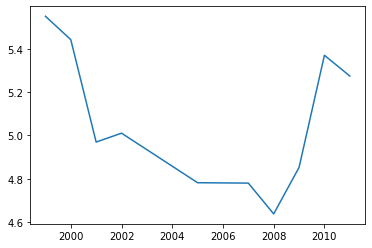

In [1350]:
x2 = []
y2 = []
for val, col in zip(can_edu_no_interp.values[0][2:], can_edu_no_interp.columns[2:]):
    y2.append(val)
    x2.append(col[1])
plt.plot(x2, y2)

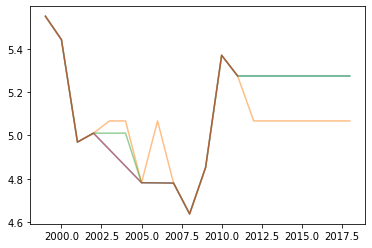

In [1351]:
x = range(1999, 2019)
for method in [interps, means]:
    y = []
    for val in method.values:
        y.append(val)
    plt.plot(x, y, alpha = 0.5)
plt.plot(x, edu_ffill.iloc[33].values[2:], alpha=0.5)
plt.plot(x2, y2, alpha = 0.5)

### Creating pivot table

In [1388]:
edu1 = (pd.pivot_table(gen_edu, index=['Country', 'LOCATION'], columns=['TIME'], values=['Value'])
.reset_index())

In [1389]:
edu1

Country LOCATION    Value                    \
TIME                                                  1999     2000     2001   
0                            Afghanistan      AFG      NaN      NaN      NaN   
1                                Albania      ALB  3.59293  3.43017  3.45870   
2                                Algeria      DZA      NaN      NaN      NaN   
3                                Andorra      AND      NaN      NaN      NaN   
4                                 Angola      AGO      NaN  2.60753      NaN   
..                                   ...      ...      ...      ...      ...   
189   Venezuela (Bolivarian Republic of)      VEN      NaN      NaN      NaN   
190                             Viet Nam      VNM      NaN      NaN      NaN   
191                                Yemen      YEM      NaN  9.64552  9.23766   
192                               Zambia      ZMB  1.77495  1.78819      NaN   
193                             Zimbabwe      ZWE      NaN      NaN      NaN   

                                                   ...                    \
TIME     2002     2003     2004     2005     2006  ...     2009     2010   
0         NaN      NaN      NaN      NaN      NaN  ...      NaN  3.47945   
1     3.11780  3.13824  3.22752  3.28155  3.19146  ...      NaN      NaN   
2         NaN      NaN      NaN      NaN      NaN  ...      NaN      NaN   
3     1.68153      NaN  1.52269  1.59653  2.18989  ...  3.15484  3.05742   
4         NaN      NaN      NaN  2.12011  2.28146  ...      NaN  3.42132   
..        ...      ...      ...      ...      ...  ...      ...      ...   
189       NaN      NaN      NaN      NaN  3.66906  ...  6.87467      NaN   
190       NaN      NaN      NaN      NaN      NaN  ...  4.81650  5.13722   
191       NaN      NaN      NaN      NaN      NaN  ...      NaN      NaN   
192       NaN      NaN  2.46343  1.73553      NaN  ...      NaN      NaN   
193       NaN      NaN      NaN      NaN      NaN  ...      NaN  1.54406   

                                                                              
TIME     2011     2012     2013     2014     2015     2016     2017     2018  
0     3.46201  2.60420  3.45446  3.69522  3.25580  4.22836  4.05887      NaN  
1         NaN      NaN  3.53930      NaN  3.43797  3.96209  3.61025  2.46866  
2         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
3     3.14508      NaN  2.43807  2.99781  3.25368  3.25670  3.19505  3.22691  
4         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
..        ...      ...      ...      ...      ...      ...      ...      ...  
189       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
190   4.81372  5.53329  5.65200      NaN      NaN  4.34481      NaN  4.17277  
191       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
192       NaN      NaN      NaN      NaN  4.62432  3.74792  3.72965  4.66738  
193       NaN  6.07021  5.99598  6.13835      NaN      NaN  5.62184  4.60449  

[194 rows x 22 columns]

### Imputing with Interpolation

In [1390]:
interps = pd.DataFrame(edu1.iloc[:,2:].interpolate(axis=1))
edu_interp = edu1[['Country', 'LOCATION']].join(interps)
edu_interp.head()

Country LOCATION    Value                                         \
TIME                           1999     2000      2001      2002      2003   
0     Afghanistan      AFG      NaN      NaN       NaN       NaN       NaN   
1         Albania      ALB  3.59293  3.43017  3.458700  3.117800  3.138240   
2         Algeria      DZA      NaN      NaN       NaN       NaN       NaN   
3         Andorra      AND      NaN      NaN       NaN  1.681530  1.602110   
4          Angola      AGO      NaN  2.60753  2.510046  2.412562  2.315078   

                                  ...                                         \
TIME      2004     2005     2006  ...      2009      2010     2011      2012   
0          NaN      NaN      NaN  ...       NaN  3.479450  3.46201  2.604200   
1     3.227520  3.28155  3.19146  ...  3.363720  3.407615  3.45151  3.495405   
2          NaN      NaN      NaN  ...  4.337020  4.337020  4.33702  4.337020   
3     1.522690  1.59653  2.18989  ...  3.154840  3.057420  3.14508  2.791575   
4     2.217594  2.12011  2.28146  ...  3.136355  3.421320  3.42132  3.421320   

                                                             
TIME     2013      2014     2015     2016     2017     2018  
0     3.45446  3.695220  3.25580  4.22836  4.05887  4.05887  
1     3.53930  3.488635  3.43797  3.96209  3.61025  2.46866  
2     4.33702  4.337020  4.33702  4.33702  4.33702  4.33702  
3     2.43807  2.997810  3.25368  3.25670  3.19505  3.22691  
4     3.42132  3.421320  3.42132  3.42132  3.42132  3.42132  

[5 rows x 22 columns]

#### Backfilling with means

In [1391]:
edu_interp_m = pd.DataFrame(edu_interp.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
edu_interp_plus = edu1[['Country', 'LOCATION']].join(edu_interp_m)
edu_interp_plus.head()

Country LOCATION     Value                                          \
TIME                            1999      2000      2001      2002      2003   
0     Afghanistan      AFG  3.588582  3.588582  3.588582  3.588582  3.588582   
1         Albania      ALB  3.592930  3.430170  3.458700  3.117800  3.138240   
2         Algeria      DZA  4.337020  4.337020  4.337020  4.337020  4.337020   
3         Andorra      AND  2.594760  2.594760  2.594760  1.681530  1.602110   
4          Angola      AGO  2.937391  2.607530  2.510046  2.412562  2.315078   

                                    ...                               \
TIME      2004      2005      2006  ...      2009      2010     2011   
0     3.588582  3.588582  3.588582  ...  3.588582  3.479450  3.46201   
1     3.227520  3.281550  3.191460  ...  3.363720  3.407615  3.45151   
2     4.337020  4.337020  4.337020  ...  4.337020  4.337020  4.33702   
3     1.522690  1.596530  2.189890  ...  3.154840  3.057420  3.14508   
4     2.217594  2.120110  2.281460  ...  3.136355  3.421320  3.42132   

                                                                       
TIME      2012     2013      2014     2015     2016     2017     2018  
0     2.604200  3.45446  3.695220  3.25580  4.22836  4.05887  4.05887  
1     3.495405  3.53930  3.488635  3.43797  3.96209  3.61025  2.46866  
2     4.337020  4.33702  4.337020  4.33702  4.33702  4.33702  4.33702  
3     2.791575  2.43807  2.997810  3.25368  3.25670  3.19505  3.22691  
4     3.421320  3.42132  3.421320  3.42132  3.42132  3.42132  3.42132  

[5 rows x 22 columns]

In [1392]:
edu_interp_plus.shape

(194, 22)

In [1444]:
pd.to_pickle(edu_interp_plus, 'edu.pkl')

In [1394]:
edu_interp_plus.iloc[33]

          TIME
Country            Canada
LOCATION              CAN
Value     1999    5.54994
          2000      5.442
          2001    4.96956
          2002    5.01073
          2003    4.93454
          2004    4.85834
          2005    4.78215
          2006    4.78125
          2007    4.78036
          2008    4.63826
          2009    4.85264
          2010    5.36993
          2011    5.27444
          2012    5.27444
          2013    5.27444
          2014    5.27444
          2015    5.27444
          2016    5.27444
          2017    5.27444
          2018    5.27444
Name: 33, dtype: object

### Imputing using means method

In [1354]:
#impute na values with row mean by row
edu_imputed_values = pd.DataFrame(edu1.iloc[:,2:].apply(lambda row: row.fillna(row.mean()), axis=1))
edu_m = edu1[['Country', 'LOCATION']].join(edu_imputed_values)

In [1355]:
edu_m.head()

Country LOCATION     Value                                          \
TIME                            1999      2000      2001      2002      2003   
0     Afghanistan      AFG  3.529796  3.529796  3.529796  3.529796  3.529796   
1         Albania      ALB  3.592930  3.430170  3.458700  3.117800  3.138240   
2         Algeria      DZA  4.337020  4.337020  4.337020  4.337020  4.337020   
3         Andorra      AND  2.647816  2.647816  2.647816  1.681530  2.647816   
4          Angola      AGO  2.607605  2.607530  2.607605  2.607605  2.607605   

                                    ...                                \
TIME      2004      2005      2006  ...      2009      2010      2011   
0     3.529796  3.529796  3.529796  ...  3.529796  3.479450  3.462010   
1     3.227520  3.281550  3.191460  ...  3.338041  3.338041  3.338041   
2     4.337020  4.337020  4.337020  ...  4.337020  4.337020  4.337020   
3     1.522690  1.596530  2.189890  ...  3.154840  3.057420  3.145080   
4     2.607605  2.120110  2.281460  ...  2.607605  3.421320  2.607605   

                                                                            
TIME      2012      2013      2014      2015      2016      2017      2018  
0     2.604200  3.454460  3.695220  3.255800  4.228360  4.058870  3.529796  
1     3.338041  3.539300  3.338041  3.437970  3.962090  3.610250  2.468660  
2     4.337020  4.337020  4.337020  4.337020  4.337020  4.337020  4.337020  
3     2.647816  2.438070  2.997810  3.253680  3.256700  3.195050  3.226910  
4     2.607605  2.607605  2.607605  2.607605  2.607605  2.607605  2.607605  

[5 rows x 22 columns]

In [1356]:
edu1[['Country', 'LOCATION']].join(edu_imputed_values).head()

Country LOCATION     Value                                          \
TIME                            1999      2000      2001      2002      2003   
0     Afghanistan      AFG  3.529796  3.529796  3.529796  3.529796  3.529796   
1         Albania      ALB  3.592930  3.430170  3.458700  3.117800  3.138240   
2         Algeria      DZA  4.337020  4.337020  4.337020  4.337020  4.337020   
3         Andorra      AND  2.647816  2.647816  2.647816  1.681530  2.647816   
4          Angola      AGO  2.607605  2.607530  2.607605  2.607605  2.607605   

                                    ...                                \
TIME      2004      2005      2006  ...      2009      2010      2011   
0     3.529796  3.529796  3.529796  ...  3.529796  3.479450  3.462010   
1     3.227520  3.281550  3.191460  ...  3.338041  3.338041  3.338041   
2     4.337020  4.337020  4.337020  ...  4.337020  4.337020  4.337020   
3     1.522690  1.596530  2.189890  ...  3.154840  3.057420  3.145080   
4     2.607605  2.120110  2.281460  ...  2.607605  3.421320  2.607605   

                                                                            
TIME      2012      2013      2014      2015      2016      2017      2018  
0     2.604200  3.454460  3.695220  3.255800  4.228360  4.058870  3.529796  
1     3.338041  3.539300  3.338041  3.437970  3.962090  3.610250  2.468660  
2     4.337020  4.337020  4.337020  4.337020  4.337020  4.337020  4.337020  
3     2.647816  2.438070  2.997810  3.253680  3.256700  3.195050  3.226910  
4     2.607605  2.607605  2.607605  2.607605  2.607605  2.607605  2.607605  

[5 rows x 22 columns]

### Raw data, no imputation

In [1357]:
can_edu_no_interp = (pd.pivot_table(can_edu, index=['Country', 'LOCATION'], columns=['TIME'], values=['Value'])
.reset_index())
can_edu_no_interp

Country LOCATION    Value                                             \
TIME                      1999   2000     2001     2002     2005     2007   
0     Canada      CAN  5.54994  5.442  4.96956  5.01073  4.78215  4.78036   

                                          
TIME     2008     2009     2010     2011  
0     4.63826  4.85264  5.36993  5.27444

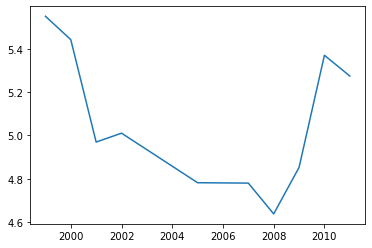

In [1358]:
x = []
y = []
for val, col in zip(can_edu_no_interp.values[0][2:], can_edu_no_interp.columns[2:]):
    y.append(val)
    x.append(col[1])
plt.plot(x, y)